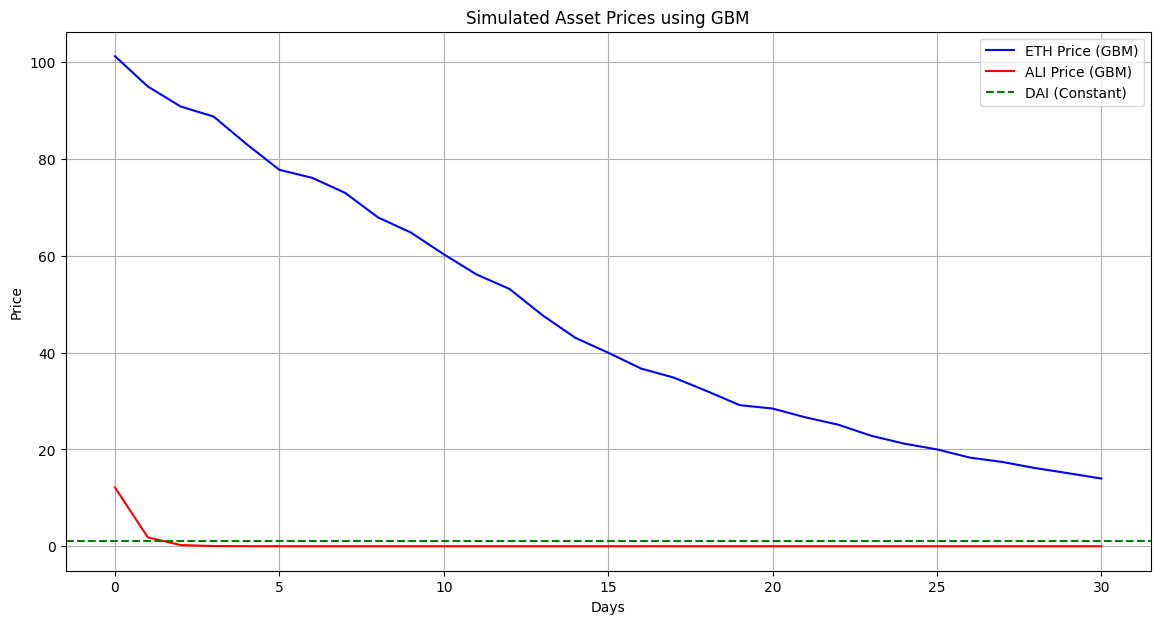

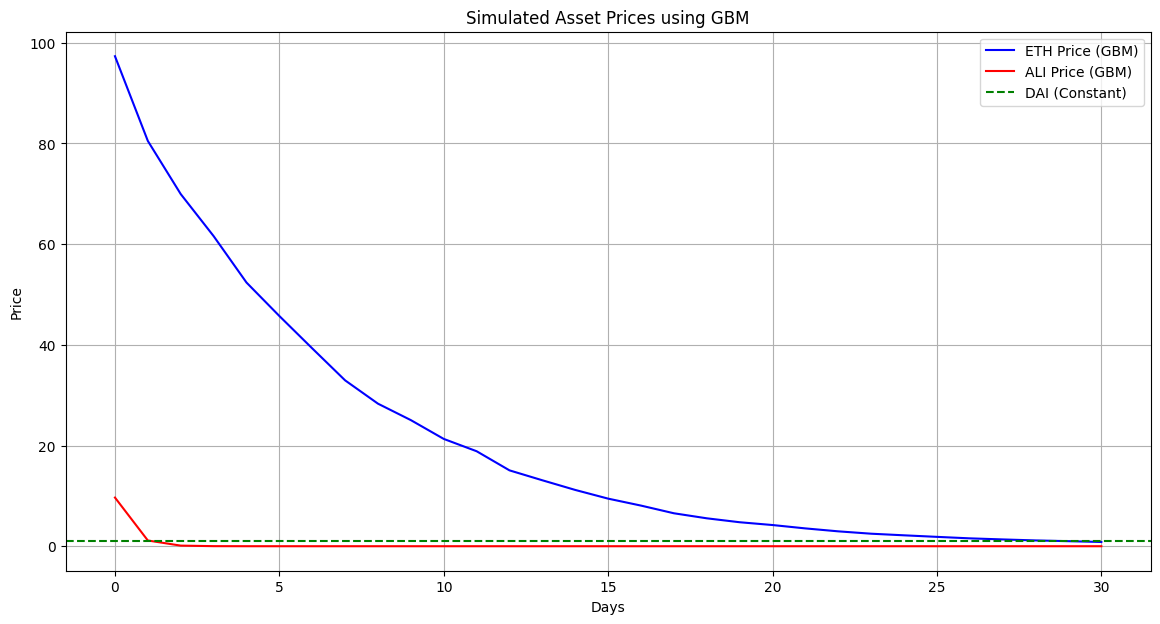

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for GBM
days = 30
dt = 1/365  # Daily increments
S0_ETH = 100  # Initial price of ETH
S0_ALI = 10  # Initial price of ALI
mu_ETH = 0.05  # Drift coefficient for ETH
mu_ALI = 0.10  # Drift coefficient for ALI
sigma_ETH = 0.47  # Volatility for ETH
sigma_ALI = 2.0  # Volatility for ALI
np.random.seed(42)  # For reproducibility
# Parameters for adjusted GBM
mu_decrease_ETH = -0.05  # Negative drift for ETH in the second half
mu_decrease_ALI = -0.10  
# Time vector
t = np.linspace(0, days, days + 1)

# Geometric Brownian Motion (GBM) model function
def GBM(S0, mu, sigma, t, dt):
    W = np.random.standard_normal(size=len(t))
    W = np.cumsum(W)*np.sqrt(dt)  # Cumulative sum to generate a random walk
    X = (mu - 0.5 * sigma**2) * t + sigma * W
    S = S0 * np.exp(X)  # GBM formula
    return S

# Simulate ETH and ALI prices using GBM
prices_ETH = GBM(S0_ETH, mu_ETH, sigma_ETH, t, dt)
prices_ALI = GBM(S0_ALI, mu_ALI, sigma_ALI, t, dt)

# Plot the simulated asset prices
plt.figure(figsize=(14, 7))
plt.plot(t, prices_ETH, label='ETH Price (GBM)', color='blue')
plt.plot(t, prices_ALI, label='ALI Price (GBM)', color='red')
plt.axhline(y=1, color='green', linestyle='--', label='DAI (Constant)')
plt.title('Simulated Asset Prices using GBM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Simulate ETH and ALI prices using GBM
prices_ETH = GBM(S0_ETH, mu_decrease_ETH , sigma_ETH, t, dt)
prices_ALI = GBM(S0_ALI, mu_decrease_ALI , sigma_ALI, t, dt)

# Plot the simulated asset prices
plt.figure(figsize=(14, 7))
plt.plot(t, prices_ETH, label='ETH Price (GBM)', color='blue')
plt.plot(t, prices_ALI, label='ALI Price (GBM)', color='red')
plt.axhline(y=1, color='green', linestyle='--', label='DAI (Constant)')
plt.title('Simulated Asset Prices using GBM')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

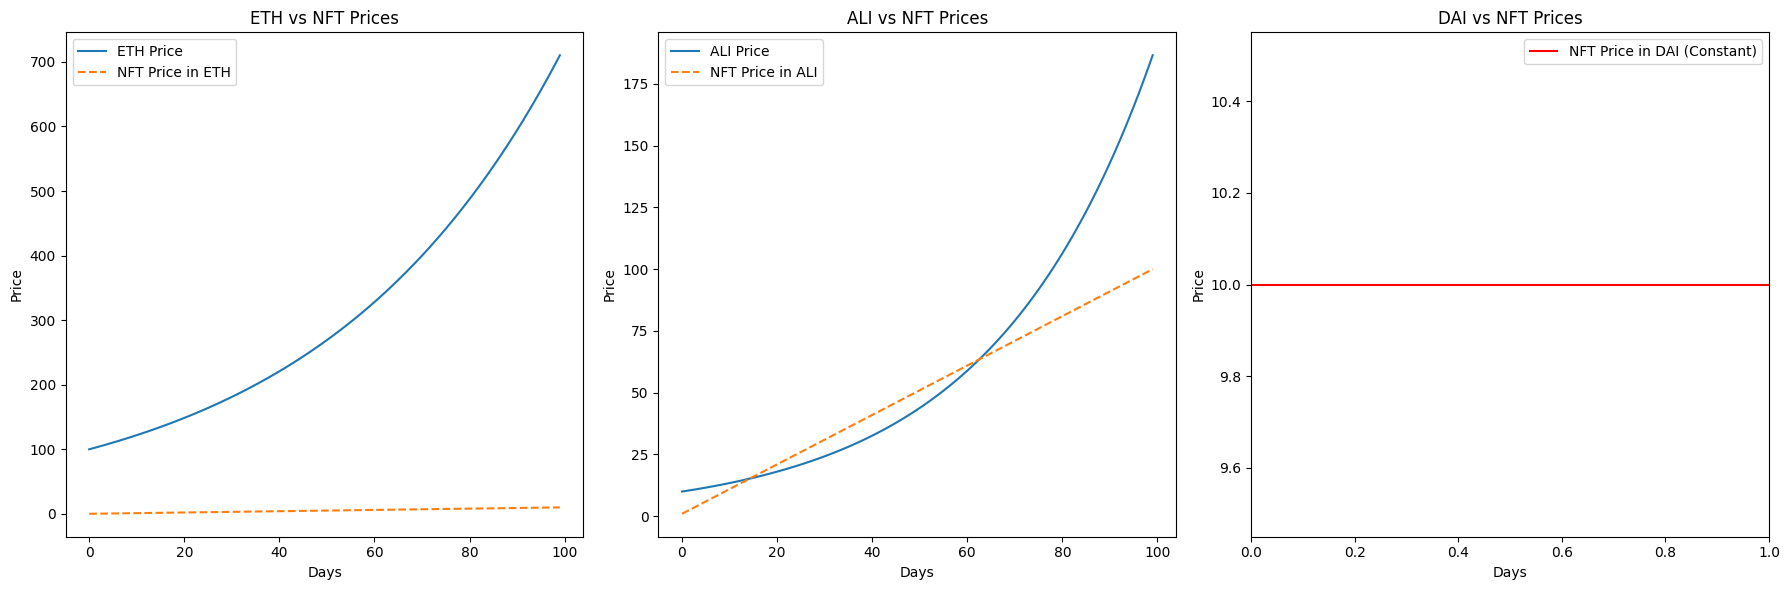

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
days = 100  # Number of days to simulate
initial_price_eth = 100  # Initial price of ETH in $
initial_price_ali = 10  # Initial price of ALI in $
price_increment_per_nft = 1  # Price increment per NFT/Key purchase on the bonding curve
initial_nft_price = 10  # Initial NFT/Key price in base currency units
eth_growth_rate = 0.02  # Daily growth rate for ETH price (2%)
ali_growth_rate = 0.03  # Daily growth rate for ALI price (3%)

initial_nft_price_eth = initial_nft_price/initial_price_eth
initial_nft_price_ali = initial_nft_price/initial_price_ali

# Simulate price changes for ETH and ALI
eth_prices = [initial_price_eth * (1 + eth_growth_rate) ** day for day in range(days)]
ali_prices = [initial_price_ali * (1 + ali_growth_rate) ** day for day in range(days)]

# Calculate NFT/Key prices in base currency (constant demand)
nft_prices_in_eth = [initial_nft_price_eth + initial_nft_price_eth * price_increment_per_nft * day for day in range(days)]
nft_prices_in_ali = [initial_nft_price_ali + initial_nft_price_ali * price_increment_per_nft * day for day in range(days)]

# Plotting
plt.figure(figsize=(18, 6))

# ETH vs NFT
plt.subplot(1, 3, 1)
plt.plot(eth_prices, label='ETH Price')
plt.plot(nft_prices_in_eth, label='NFT Price in ETH', linestyle='--')
plt.title('ETH vs NFT Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

# ALI vs NFT
plt.subplot(1, 3, 2)
plt.plot(ali_prices, label='ALI Price')
plt.plot(nft_prices_in_ali, label='NFT Price in ALI', linestyle='--')
plt.title('ALI vs NFT Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

# DAI vs NFT (Stablecoin, hence constant)
plt.subplot(1, 3, 3)
plt.axhline(y=initial_nft_price, color='r', linestyle='-', label='NFT Price in DAI (Constant)')
plt.title('DAI vs NFT Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

plt.tight_layout()
plt.show()
